In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
df = pd.read_csv(r'C:\Users\Ashmi\Downloads\archive (8)\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [5]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
columns_to_process = ['budget', 'gross', 'runtime', 'votes','score']

for column in columns_to_process:
    mean_value = df[column].mean()
    df[column] = df[column].fillna(mean_value).astype('int64')

In [7]:
print(df.dtypes)

name        object
rating      object
genre       object
year         int64
released    object
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object


In [8]:
released_column = df['released']

# Extract the year using regular expressions
df['correctedyear'] = released_column.str.extract(r'\b(\d{4})\b')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [9]:

pd.set_option('display.max_rows', None)
df= df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


<Axes: >

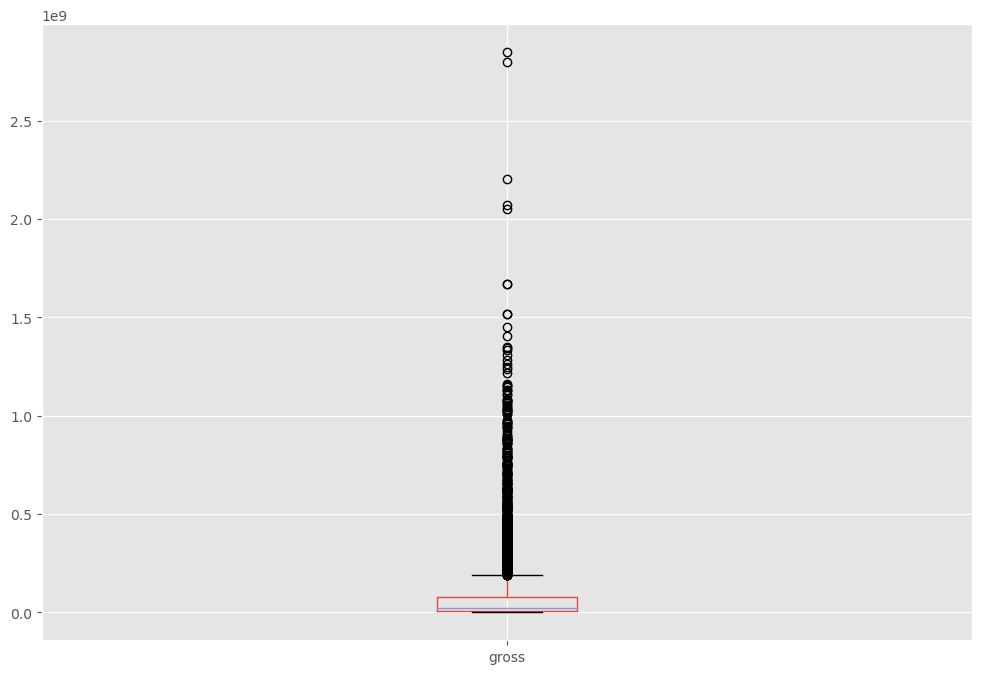

In [10]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [11]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


<Axes: xlabel='budget', ylabel='gross'>

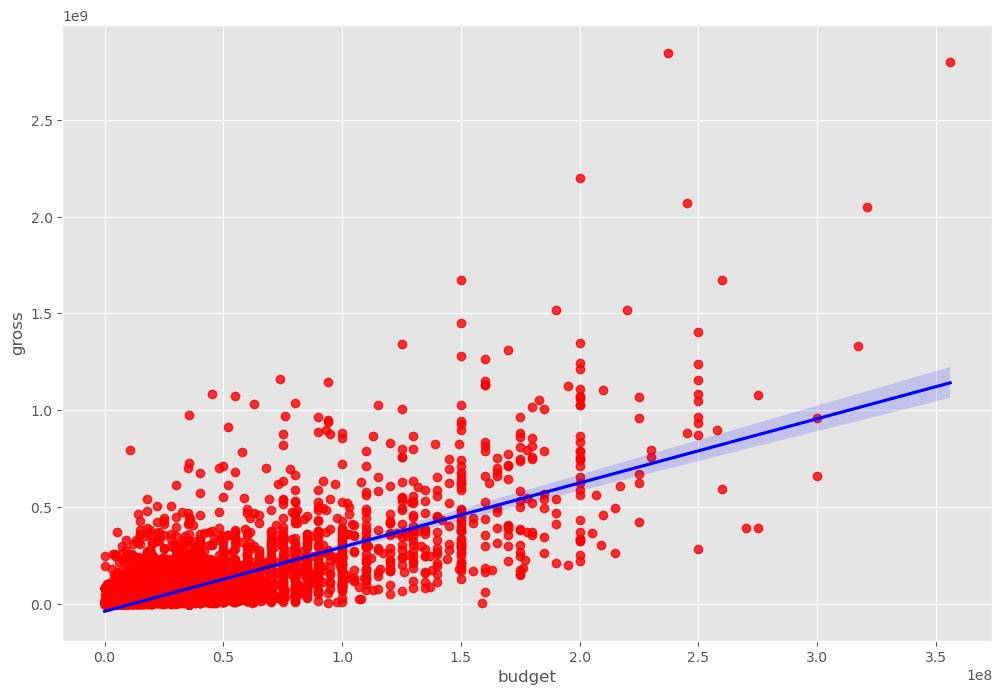

In [12]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data= df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [13]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [14]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedyear
5445,533,5,0,2009,696,7,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,29
7445,535,5,0,2019,183,8,903000,162,743,2241,55,356000000,2797501328,1606,181,39
3045,6896,5,6,1997,704,7,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,17
6663,5144,5,0,2015,698,7,876000,1125,2550,524,55,245000000,2069521700,1540,138,35
7244,536,5,0,2018,192,8,897000,162,743,2241,55,321000000,2048359754,1606,149,38


In [15]:
df.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedyear
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017825,0.013086,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010386,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.003993,0.033127,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062057,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.023595,-0.145276,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052701,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.096100,0.222810,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120758,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.041287,0.016094,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000877,-0.003775
score,0.017825,-0.003993,0.023595,0.096100,0.041287,1.000000,0.393355,0.016695,0.020540,-0.001492,-0.125567,0.059254,0.174156,-0.000669,0.382873,0.104293
votes,0.013086,0.033127,-0.145276,0.222810,0.016094,0.393355,1.000000,0.000260,0.000891,-0.019277,0.073622,0.421007,0.628713,0.133129,0.309168,0.218161
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.016695,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017623,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.020540,0.000891,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003512,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001492,-0.019277,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010169,-0.027606


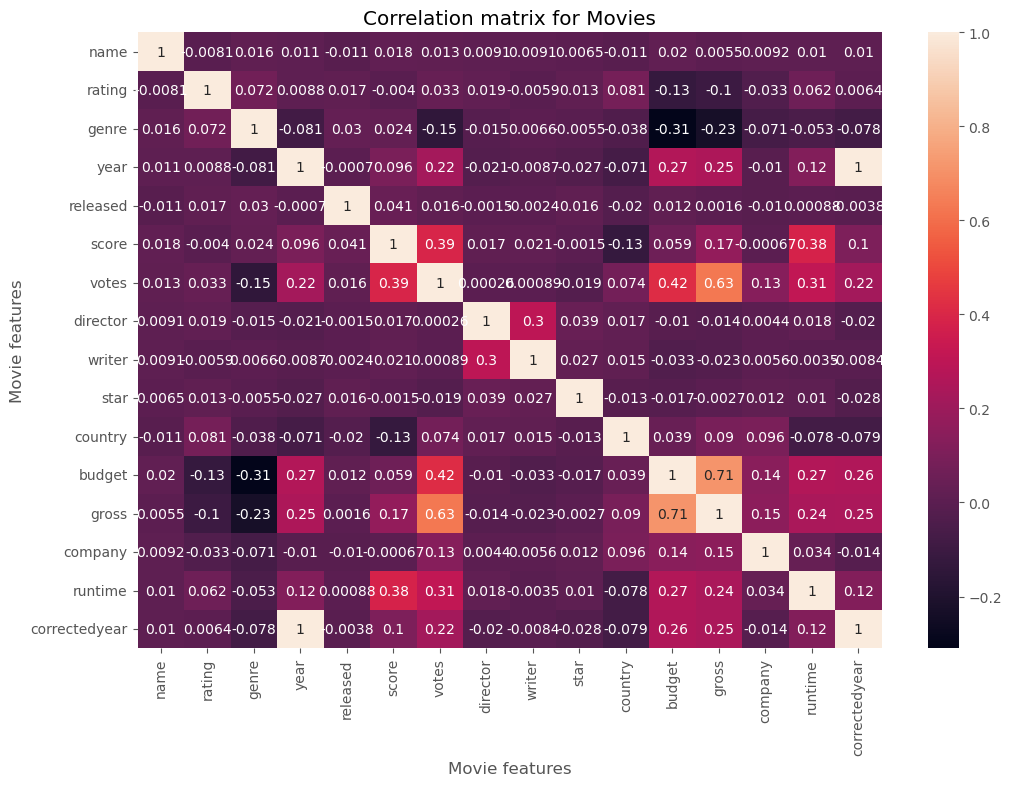

In [16]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [17]:
correlation_mat = df.corr(method='pearson')
corr_pairs = correlation_mat.unstack()
corr_pairs

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.011453
               released        -0.011311
               score            0.017825
               votes            0.013086
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.020368
               gross            0.005466
               company          0.009211
               runtime          0.010386
               correctedyear    0.010225
rating         name            -0.008069
               rating           1.000000
               genre            0.072423
               year             0.008779
               released         0.016613
               score           -0.003993
               votes            0.033127
               director         0.019483
               w

In [19]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.310566
budget  genre    -0.310566
genre   gross    -0.230267
gross   genre    -0.230267
votes   genre    -0.145276
dtype: float64

In [20]:
high_corr = sorted_pairs[(sorted_pairs) > 0.4]
high_corr

budget         votes            0.421007
votes          budget           0.421007
               gross            0.628713
gross          votes            0.628713
budget         gross            0.711270
gross          budget           0.711270
correctedyear  year             0.996397
year           correctedyear    0.996397
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
correctedyear  correctedyear    1.000000
dtype: float64

In [ ]:
# Hence votes and budget has highest correlation with gross
# company has low correlation